In [1]:
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cv2 as cv 
from matplotlib.cm import ScalarMappable
%matplotlib inline

In [12]:

def plot_curve_strain_PPT2(image_file,a):
    #a is the array of coordinates
    #print('The event is between timeframe {} & {},z={}, y={}, x={}'.format(int(a[0]),int(a[0])+1,int(a[1]),int(a[2]),int(a[3])))
    axis = ['x','y','z']
    print(a)
    im1 = ND2Reader(image_file)
    im1 = np.array(im1)
    print(im1.shape[1])
    fig, axs = plt.subplots(
        2,2, figsize=(10,8), sharex='col', sharey='row', 
        subplot_kw={'aspect': 'equal'}, 
            gridspec_kw={
        'width_ratios':[im1.shape[1], im1.shape[0]], 
        'height_ratios':[im1.shape[0], im1.shape[2]]
            }
    )
    
    Z =int(a[0])
    Y = int(a[1])
    print(a[1])
    X = int(a[2])
    lc = (1,0.5,0.5,0.5)

    im = axs[1,0].imshow(im1[Z], 'viridis')
    axs[1,0].axvline(X, color=lc,linewidth=3)
    axs[1,0].axhline(Y, color=lc,linewidth=3)

    axs[0,0].imshow(im1[:,Y,:], 'viridis')
    axs[0,0].axhline(Z, color=lc,linewidth=3)
    axs[0,0].axvline(X, color=lc,linewidth=3)

    axs[1,1].imshow(im1[:,:,X].T, 'viridis')
    axs[1,1].axhline(Y, color=lc,linewidth=3)
    axs[1,1].axvline(Z, color=lc,linewidth=3)


    axs[0,1].set_axis_off()#set_visible(False)
    
    axins = inset_axes(axs[1,0],
                   width="5%",  # width = 5% of parent_bbox width
                   height="80%",  # height : 50%
                   loc='center left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axs[1,0].transAxes,
                   borderpad=0,
                   )
    cb = fig.colorbar(im, cax=axins)
    cb.set_label(label  ='I',fontsize = 18)
    #mapping = axs[0,1].imshow(norm[int(a[2])], vmin=0, vmax=vv)
    #fig.delaxes(axs[0,1])
    #cbar = fig.colorbar(mapping,ax=axs[0,1],label  ='|$\.{\gamma}$|')
    axs[1,0].set_xlabel('X', fontsize = 18)
    axs[1,0].set_ylabel('Y',fontsize = 18)
    axs[0,0].set_ylabel('Z',fontsize = 18)
    axs[1,1].set_xlabel('Z',fontsize = 18)
    
    axf = axs.flatten()
    for ax in axf:
        ax.tick_params(axis="x", labelsize=14)
        ax.tick_params(axis="y", labelsize=14) 
    axs[0,0].invert_yaxis()
    axs[0,0].invert_xaxis()
    #axs[,0].invert_yaxis()
    plt.tight_layout()
    plt.savefig(r"20231208__sbr_3mm_bulk_post_cl_soxhlet_setting_3_z_X_{}_Y_{}_Z{}.png".format(int(a[0]), int(a[1]),int(a[2])))

[20, 256, 256]
512
256


C:\Users\AKASHS~1\AppData\Local\Temp/ipykernel_28372/2519457907.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


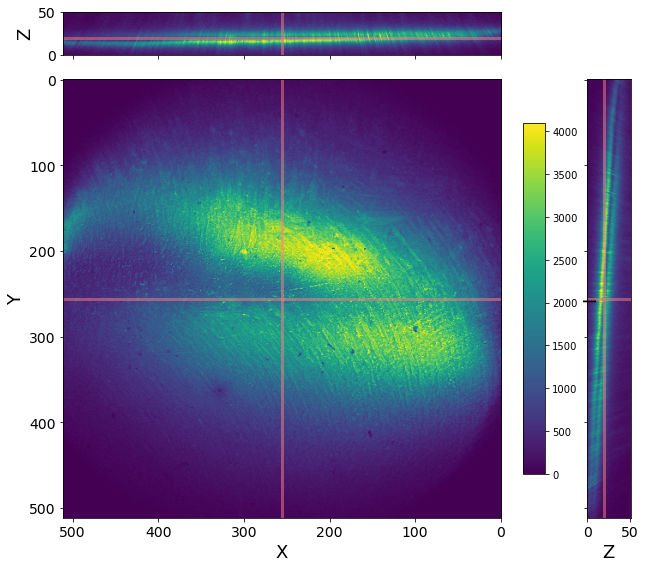

In [3]:
plot_curve_strain_PPT2(r"D:\ESPCI\Experiments\mechanoconfocal\20231128\20231201\sbr_20231004_bulk_r2o2_2.5_soxhlettwo_zstack.nd2",[20,256,256])

I took some sample one I put in soxhlet

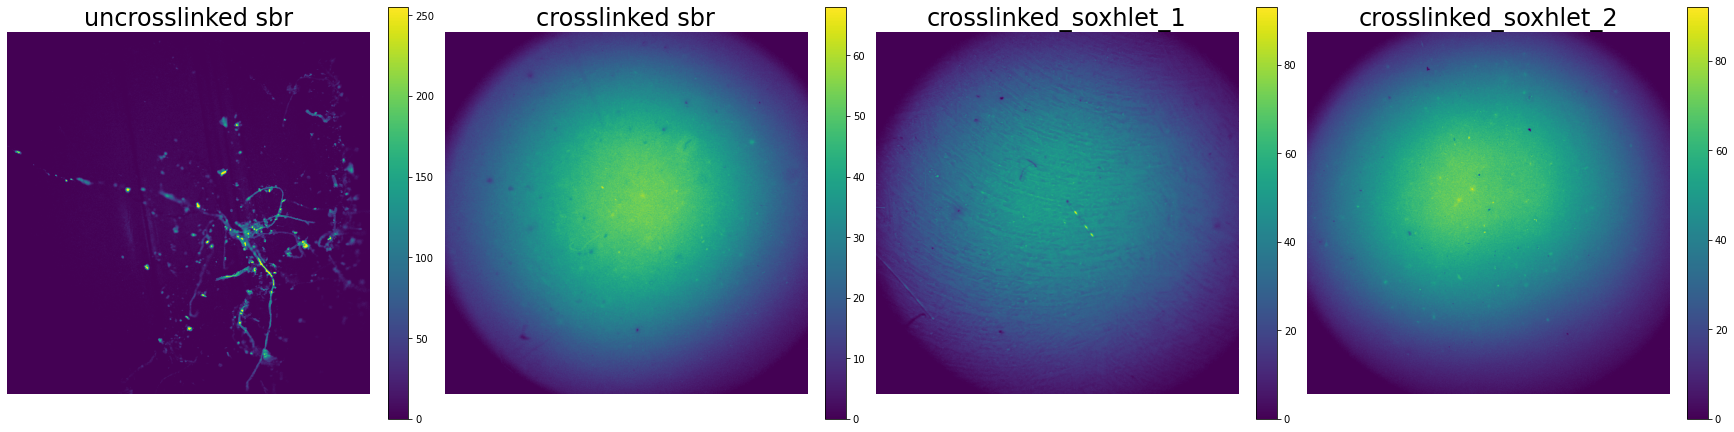

In [7]:
images = [r"D:\ESPCI\Experiments\mechanoconfocal\20231128\organized\bulk\postcrosslinking\setting_I_5_G_1_ph_28.4\sbrbulk_nocrosslik_presoxhlet_1.png",
          r"D:\ESPCI\Experiments\mechanoconfocal\20231128\organized\bulk\postcrosslinking\setting_I_5_G_1_ph_28.4\sbr_20231004_bulk_r2o2_2.5_no_soxhlet_1.png",
          r"D:\ESPCI\Experiments\mechanoconfocal\20231128\organized\bulk\postcrosslinking\setting_I_5_G_1_ph_28.4\sbr_20231004_bulk_r2o2_2.5_soxhlet_1.png",
          r"D:\ESPCI\Experiments\mechanoconfocal\20231128\organized\bulk\postcrosslinking\setting_I_5_G_1_ph_28.4\sbr_20231004_bulk_r2o2_2.5_soxhlettwo_1.png"]

titles = ['uncrosslinked sbr', 'crosslinked sbr', 'crosslinked_soxhlet_1', 'crosslinked_soxhlet_2']
fig, axs = plt.subplots(1,4, figsize=(24,6), constrained_layout = True)
for i, image in enumerate(images):
    im = cv.imread(image)
    imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    axs[i].imshow(imgray)

    # Add colorbar using ScalarMappable
    sm = ScalarMappable(cmap='viridis')
    sm.set_array(imgray)
    cb = fig.colorbar(sm, ax=axs[i])
    
    axs[i].set_title(titles[i], fontsize = 24)
    axs[i].set_axis_off()
fig.savefig(r"D:\ESPCI\Experiments\mechanoconfocal\20231128\bulk_r2o2_2.5_soxhlettwo.png")

I hardly see any difference!

I try to do soxhlet before 
I follow the same sample with time  first imaging the ecoflex 1 um and 2 um thick. Later the same sample I depoisut a sbr film and image it after drying but before crosslinking

In [102]:
plt.imshow?

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    *,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`image.interpolation`.

Parameters


[15, 256, 256]
512
256


C:\Users\AKASHS~1\AppData\Local\Temp/ipykernel_28372/3553385104.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


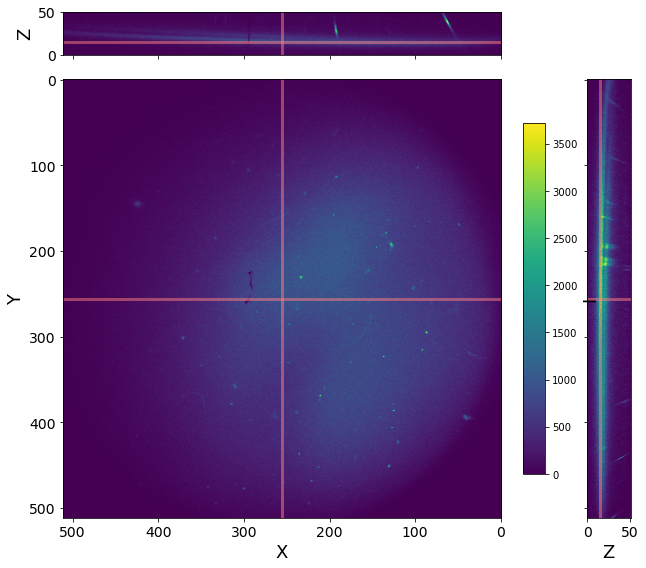

In [13]:
plot_curve_strain_PPT2(r"D:\ESPCI\Experiments\mechanoconfocal\20231128\20231211\20231208__sbr_3mm_bulk_post_cl_soxhlet_setting_3_z.nd2",[15,256,256])